







# IMPORTING REQUIRED MODULES

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

# DATA SET IMPORTING

In [7]:
#read_csv is an important pandas function to read csv files and do operations on it.
data=pd.read_csv('heart.csv')

In [8]:
data.head()
#Pandas head() method is used to return top n (5 by default) rows of a data frame or series.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
data.info()
#Pandas dataframe.info() function is used to get a concise summary of the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BB0240128>,
      dtype=object)

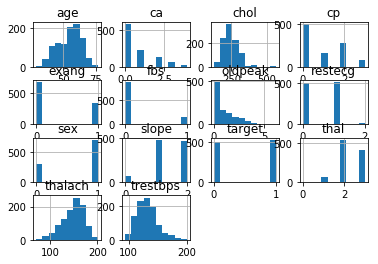

In [10]:
data.hist()
'''A histogram shows the frequency on the vertical axis and the horizontal axis is another dimension. Usually it has bins, 
where every bin has a minimum and maximum value. Each bin also has a frequency between x and infinite.'''

# DATASET EVALUATION

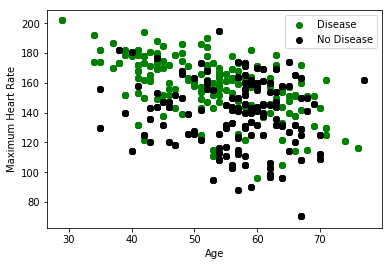

In [11]:
plt.scatter(x=data.age[data.target==1],
y=data.thalach[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0],
y=data.thalach[(data.target==0)], c = 'black')
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [12]:
import seaborn as sns

In [13]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

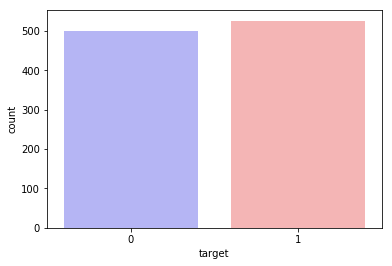

In [14]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

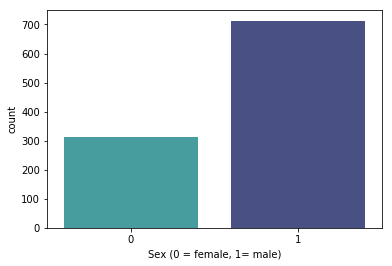

In [15]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

# TRAINING AND TESTING DATASET USING KNN AND DECISION TREE ALGORITHMS

In [16]:
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =
0.25, random_state= 0)

In [17]:
from sklearn import metrics
classifier = KNeighborsClassifier(n_neighbors = 5, metric =
'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)

In [18]:
k_range = range(1, 13)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[1.0, 0.9377431906614786, 0.8910505836575876, 0.8054474708171206, 0.7431906614785992, 0.754863813229572, 0.7431906614785992, 0.7509727626459144, 0.7626459143968871, 0.7898832684824902, 0.7782101167315175, 0.7665369649805448]


Text(0, 0.5, 'Testing Accuracy')

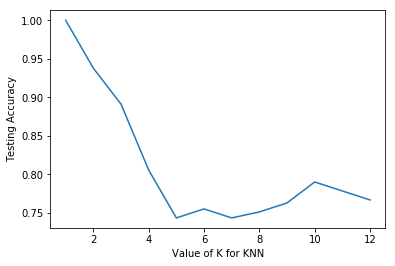

In [19]:

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [20]:
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.74


In [21]:
classifier = KNeighborsClassifier(n_neighbors = 2, metric ='minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.94


In [22]:
classifier = KNeighborsClassifier(n_neighbors = 6, metric ='minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.75


In [23]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric ='minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.74


In [24]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric ='minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.75


# decision tree

In [25]:
dtc = DecisionTreeClassifier()
clf=dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))



Test set score: 1.00


In [26]:
k_range = range(1, 13)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = DecisionTreeClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Testing Accuracy')

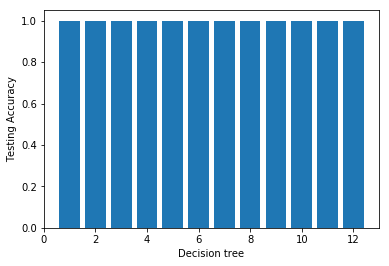

In [27]:
plt.bar(k_range, scores)
plt.xlabel('Decision tree')
plt.ylabel('Testing Accuracy')

TRAINING AND TESTING DATASET USING KNN AND DECISION TREE ALGORITHMS


# when test size=20%

In [28]:
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =
0.20, random_state= 0)

In [29]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [30]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1
 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1]


In [31]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.91


In [32]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [33]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))


Test set score: 1.00


# when test size=30%

In [34]:
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =
0.30, random_state= 0)

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [36]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1
 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0
 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1
 0 1 0 1 0 0 0 1 1 0 1 0]


In [37]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.89


In [38]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [39]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.99


In [40]:
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.30, random_state= 0)

# principal component analysis


In [41]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 

X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

explained_variance = pca.explained_variance_ratio_ 


In [42]:
# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
# Predicting the test set result using 
# predict function under LogisticRegression 
y_pred = classifier.predict(X_test) 


In [44]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))


Test set score: 0.73


In [45]:
print("Test set score: {:.2f}".format(classifier.score(X_test, y_test)))

Test set score: 0.73



# RANDOM FOREST

In [46]:
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.25, random_state= 0)

In [47]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 

# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

# fit the regressor with x and y data 
regressor.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
y_pred = regressor.predict(X_test) # test the output by changing values 


In [49]:
print("Test set score: {:.2f}".format(regressor.score(X_test, y_test)))

Test set score: 0.98
